In [66]:
%matplotlib inline
import numpy as np
import matplotlib,matplotlib.pyplot as plt

In [70]:
RANGE = [int(2**i) for i in np.arange(7,13)]

In [71]:
def read_results(filename):
    res = {i:[] for i in RANGE}
    with open(filename, "r") as f:
        for l in f:
            s = l.strip("\n").split(",")
            size = int(s[0])
            duration = float(s[1])
            if size in RANGE:
                res[size].append(duration)
    return res

In [72]:
res_ours = read_results("res_ours.csv")
res_baseline = read_results("res_baseline.csv")

In [73]:
means_ours = []
means_baseline = []
stds_ours = []
stds_baseline = []
for i in RANGE:
    means_ours.append(np.mean(res_ours[i]))
    means_baseline.append(np.mean(res_baseline[i]))
    stds_ours.append(np.std(res_ours[i]))
    stds_baseline.append(np.std(res_baseline[i]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


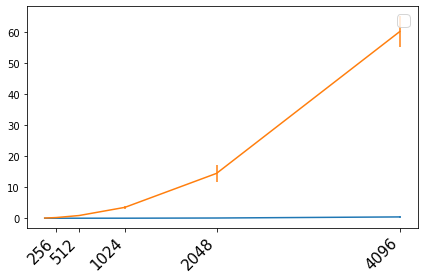

In [87]:
fig, ax = plt.subplots()
#plt.plot(RANGE, means_ours, label="Ours")
plt.errorbar(RANGE, means_ours, yerr=stds_ours, barsabove=True)
#plt.plot(RANGE, means_baseline, label="BFS")
plt.errorbar(RANGE, means_baseline, yerr=stds_baseline, barsabove=True)

plt.legend(fontsize=16)
#plt.xscale("log")
#plt.yscale("log")
plt.xticks(RANGE[1:],rotation=45, ha="right", fontsize=15)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tight_layout()
plt.savefig("results.png", )